### Forward Propagation for a 3-NN

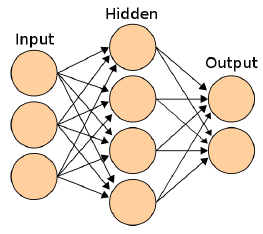

**Implementation Notes**

* Enter the weights according to wij, where i is the neuron in the output layer and j are all the neurons in the input layer connected to it.

In [1]:
import numpy as np

layers = {}

def activation(x, activation_value):
    if activation_value == 'sigmoid':
        return 1/(1+np.exp(-x))
    if activation_value == 'tanh':
        return np.tanh(x)
    if activation_value == 'relu':
        return x * (x > 0)
    if activation_value == 'linear':
        return np.array(x)
    
def forward(inputs, activations, weights):
    print("inputs are \n", inputs, "\n")
    
    hidden_outputs = np.dot(weights[0].T, inputs)
    print("initial hidden layer is \n", hidden_outputs, "\n")
    hidden_outputs_activation = activation(hidden_outputs, activations[0])
    print("hidden layer post activation is \n", hidden_outputs_activation, "\n")
    hidden_outputs = np.concatenate((hidden_outputs, np.ones((1, hidden_outputs.shape[1]))), axis=0)
    hidden_outputs_activation = np.concatenate((hidden_outputs_activation, np.ones((1, hidden_outputs_activation.shape[1]))), axis=0)
    
    final_layer = np.dot(weights[1].T, hidden_outputs_activation)
    print("initial final layer is \n", final_layer, "\n")
    final_layer_activation = activation(final_layer, activations[1])
    print("final layer post activation is \n", final_layer_activation, "\n")
    
    layers['hidden'] = {}
    layers['hidden']['original'] = hidden_outputs
    layers['hidden']['activated'] = hidden_outputs_activation
    
    layers['outputs'] = {}
    layers['outputs']['original'] = final_layer
    layers['outputs']['activated'] = final_layer_activation

### Stochastic Back Propagation for a 3-NN

**Implementation Notes**

* Enter the weights according to wij, where i is the neuron in the output layer and j are all the neurons in the input layer connected to it.

In [2]:
import numpy as np

def derivative(x, activation_value):
    if activation_value == 'sigmoid':
        return activation(x, 'sigmoid') * (1 - activation(x, 'sigmoid'))
    if activation_value == 'tanh':
        return 1 - activation(x, 'tanh')**2
    if activation_value == 'relu':
        return np.array(x > 0)
    if activation_value == 'linear':
        return 1

def activation(x, activation_value):
    if activation_value == 'sigmoid':
        return 1/(1+np.exp(-x))
    if activation_value == 'tanh':
        return np.tanh(x)
    if activation_value == 'relu':
        return x * (x > 0)
    if activation_value == 'linear':
        return np.array(x)

def compute_loss(labels, outputs):
    return np.sum(0.5*((labels - outputs)**2))
    
def backward(inputs, labels, weights, learning_rate, layers):
    loss = compute_loss(labels, layers['outputs']['activated'])
    print("the loss is", loss, "\n")
    
    delta_weights_hidden_output = np.zeros(weights[1].shape)
    delta_k = np.zeros(layers['outputs']['activated'].shape)
    for k in range(weights[1].shape[1]):
        for j in range(weights[1].shape[0]):
            diff = labels[k,0] - layers['outputs']['activated'][k]
            weights_k = weights[1][:,k]            
            net_value = np.dot(weights_k, layers['hidden']['activated'])
            derivative_net_value = derivative(net_value, 'sigmoid')
            y_j = layers['hidden']['activated'][j]
            delta_k[k] = diff*derivative_net_value
            delta_weights_hidden_output[j][k] = learning_rate*diff*derivative_net_value*y_j
            
    print("the changes in weights between hidden and output layer is \n", delta_weights_hidden_output, "\n")
    print("the updated weights can be seen as \n", weights[-1] + delta_weights_hidden_output, "\n")

    delta_weights_input_hidden = np.zeros(weights[0].shape)
    for j in range(weights[0].shape[1]):
        for i in range(weights[0].shape[0]):
            weights_j = weights[0][:,j]
            net_value = np.dot(weights_j, inputs)
            derivative_net_value = derivative(net_value, 'sigmoid')
            x_i = inputs[i]
            weights_jk = weights[1][j,:]
            required_sum = np.dot(weights_jk, delta_k)
            delta_weights_input_hidden[i][j] = learning_rate*derivative_net_value*required_sum*x_i

    print("the changes in weights between input and hidden layer is \n", delta_weights_input_hidden, "\n")
    print("the updated weights can be seen as \n", weights[0] + delta_weights_input_hidden, "\n")


# append 1 at the end to account for bias if needed
inputs = np.array([[-1, 2, 1]]).T

# this needs to be w, not w.T
weights_input_hidden = np.array([[1, 2], [0, 3], [4, 0]])

# this needs to be w, not w.T
weights_hidden_output = np.array([[5, 6], [0, 7], [0, 8]])

forward(inputs, ['linear','linear'], [weights_input_hidden, weights_hidden_output])

# add labels separated by a comma as [0.5,0.4]
labels = np.array([[-6, 8]]).T

weights = [weights_input_hidden, weights_hidden_output]
learning_rate = 0.1

backward(inputs, labels, weights, learning_rate, layers)

inputs are 
 [[-1]
 [ 2]
 [ 1]] 

initial hidden layer is 
 [[3]
 [4]] 

hidden layer post activation is 
 [[3]
 [4]] 

initial final layer is 
 [[15.]
 [54.]] 

final layer post activation is 
 [[15.]
 [54.]] 

the loss is 1278.5 

the changes in weights between hidden and output layer is 
 [[-1.92718344e-06 -0.00000000e+00]
 [-2.56957792e-06 -0.00000000e+00]
 [-6.42394480e-07 -0.00000000e+00]] 

the updated weights can be seen as 
 [[ 4.99999807e+00  6.00000000e+00]
 [-2.56957792e-06  7.00000000e+00]
 [-6.42394480e-07  8.00000000e+00]] 

the changes in weights between input and hidden layer is 
 [[ 1.45106184e-07 -0.00000000e+00]
 [-2.90212368e-07  0.00000000e+00]
 [-1.45106184e-07  0.00000000e+00]] 

the updated weights can be seen as 
 [[ 1.00000015e+00  2.00000000e+00]
 [-2.90212368e-07  3.00000000e+00]
 [ 3.99999985e+00  0.00000000e+00]] 



### Stochastic Back Propagation with PyTorch

Input format for weights - all neurons connected to a single neuron in the next layer go together in a single paranthesis. Make the list of parenthesis for all neurons in the next layer.

In [53]:
import torch
from torch import nn

model = nn.Sequential(
    nn.Linear(2, 2, bias=True),
    nn.Sigmoid(),
    nn.Linear(2, 2, bias=True)
)

In [54]:
import torch.optim as optim

criterion = nn.MSELoss(reduction='sum')
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [55]:
# wj
model[0].weight.data = torch.nn.Parameter(torch.tensor([[0.5, 0.],
                                                        [0.3, -0.7]]), requires_grad=True)

# w0
model[0].bias.data = torch.nn.Parameter(torch.tensor([0.2, 0]), requires_grad=True)

# mk
model[2].weight.data = torch.nn.Parameter(torch.tensor([[0.8,1.6]]), requires_grad=True)

#m0
model[2].bias.data = torch.nn.Parameter(torch.tensor([-0.4]), requires_grad=True)

In [56]:
inputs = torch.tensor([[0.1, 0.9]]) # append 1 at the end for bias
labels = torch.tensor([[0.5]])

for epoch in range(1):  # loop over the dataset multiple times
    for example, label in zip(inputs, labels):
        initial_weight_0 = model[0].weight.data.clone().detach()
        initial_bias_0 = model[0].bias.data.clone().detach()
        initial_weight_1 = model[2].weight.data.clone().detach()
        initial_bias_1 = model[2].bias.data.clone().detach()
        
        print("For example \n", example.data, "\n \n and label t \n", label.data, "\n")
        print("The input to hidden layer weights are \n", model[0].weight.data, "\n")
        print("The input to hidden layer bias is \n", model[0].bias.data, "\n")
        print("The hidden to output layer weights are \n", model[2].weight.data, "\n")
        print("The hidden to output layer bias is \n", model[2].bias.data, "\n")
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        output = model(example)
        print("The outputs are (z) \n", output, "\n")
        
        loss = 0.5*criterion(output, label)
        print("The loss is \n", loss, "\n")
        
        loss.backward()
        optimizer.step()        
        
        print("The changes b/w input to hidden layer weights are \n", model[0].weight.data - initial_weight_0, "\n")
        print("The changes b/w input to hidden layer bias is \n", model[0].bias.data - initial_bias_0, "\n")
        print("The changes b/w hidden to output layer weights are \n", model[2].weight.data - initial_weight_1, "\n")
        print("The changes b/w hidden to output layer bias is \n", model[2].bias.data - initial_bias_1, "\n")
        
        print("The input to hidden layer weights are \n", model[0].weight.data, "\n")
        print("The input to hidden layer bias is \n", model[0].bias.data, "\n")
        print("The hidden to output layer weights are \n", model[2].weight.data, "\n")
        print("The hidden to output layer bias is \n", model[2].bias.data, "\n")
        
        print("\n --------------------- \n")

For example 
 tensor([0.1000, 0.9000]) 
 
 and label t 
 tensor([0.5000]) 

The input to hidden layer weights are 
 tensor([[ 0.5000,  0.0000],
        [ 0.3000, -0.7000]]) 

The input to hidden layer bias is 
 tensor([0.2000, 0.0000]) 

The hidden to output layer weights are 
 tensor([[0.8000, 1.6000]]) 

The hidden to output layer bias is 
 tensor([-0.4000]) 

The outputs are (z) 
 tensor([-0.7869], grad_fn=<TanhBackward0>) 

The loss is 
 tensor(0.8281, grad_fn=<MulBackward0>) 

The changes b/w input to hidden layer weights are 
 tensor([[0.0092, 0.0829],
        [0.0139, 0.1255]]) 

The changes b/w input to hidden layer bias is 
 tensor([0.0921, 0.1395]) 

The changes b/w hidden to output layer weights are 
 tensor([[ 0.0300, -0.0658]]) 

The changes b/w hidden to output layer bias is 
 tensor([0.1225]) 

The input to hidden layer weights are 
 tensor([[ 0.5092,  0.0829],
        [ 0.3139, -0.5745]]) 

The input to hidden layer bias is 
 tensor([0.2921, 0.1395]) 

The hidden to out

### Batch Back Propagation with PyTorch

In [7]:
import torch
from torch import nn

model = nn.Sequential(
    nn.Linear(2, 2, bias=True),
    nn.Linear(2, 2, bias=True)
)

In [8]:
import torch.optim as optim

criterion = nn.MSELoss(reduction='sum')
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [9]:
model[0].weight.data = torch.nn.Parameter(torch.tensor([[1.,0.],
                                                        [2.,3.]]), requires_grad=True)

model[0].bias.data = torch.nn.Parameter(torch.tensor([4., 0]), requires_grad=True)

model[1].weight.data = torch.nn.Parameter(torch.tensor([[5.,0.],
                                                        [6.,7.]]), requires_grad=True)

model[1].bias.data = torch.nn.Parameter(torch.tensor([0.,8.]), requires_grad=True)

In [10]:
inputs = torch.tensor([[-1.,2.],
                       [-3.,4.]])

labels = torch.tensor([[-6., 8.],
                       [-2., 4.]])

for epoch in range(1):  # loop over the dataset multiple times
    initial_weight_0 = model[0].weight.data.clone().detach()
    initial_bias_0 = model[0].bias.data.clone().detach()
    initial_weight_1 = model[1].weight.data.clone().detach()
    initial_bias_1 = model[1].bias.data.clone().detach()

    print("For example \n", example.data, "\n \n and label \n", label.data, "\n")
    print("The input to hidden layer weights are \n", model[0].weight.data, "\n")
    print("The input to hidden layer bias is \n", model[0].bias.data, "\n")
    print("The hidden to output layer weights are \n", model[1].weight.data, "\n")
    print("The hidden to output layer bias is \n", model[1].bias.data, "\n")

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = model(inputs)
    print("The outputs are \n", outputs, "\n")

    loss = 0.5*criterion(outputs, labels)
    print("The loss is \n", loss, "\n")

    loss.backward()
    optimizer.step()
    
    print("The changes b/w input to hidden layer weights are \n", model[0].weight.data - initial_weight_0, "\n")
    print("The changes b/w input to hidden layer bias is \n", model[0].bias.data - initial_bias_0, "\n")
    print("The changes b/w hidden to output layer weights are \n", model[1].weight.data - initial_weight_1, "\n")
    print("The changes b/w hidden to output layer bias is \n", model[1].bias.data - initial_bias_1, "\n")

    print("The input to hidden layer weights are \n", model[0].weight.data, "\n")
    print("The input to hidden layer bias is \n", model[0].bias.data, "\n")
    print("The hidden to output layer weights are \n", model[1].weight.data, "\n")
    print("The hidden to output layer bias is \n", model[1].bias.data, "\n")

    print("\n --------------------- \n")

For example 
 tensor([0.1000, 0.9000]) 
 
 and label 
 tensor([0.5000]) 

The input to hidden layer weights are 
 tensor([[1., 0.],
        [2., 3.]]) 

The input to hidden layer bias is 
 tensor([4., 0.]) 

The hidden to output layer weights are 
 tensor([[5., 0.],
        [6., 7.]]) 

The hidden to output layer bias is 
 tensor([0., 8.]) 

The outputs are 
 tensor([[15., 54.],
        [ 5., 56.]], grad_fn=<AddmmBackward0>) 

The loss is 
 tensor(2655., grad_fn=<MulBackward0>) 

The changes b/w input to hidden layer weights are 
 tensor([[ 142.2000, -215.0000],
        [ 141.4000, -210.0000]]) 

The changes b/w input to hidden layer bias is 
 tensor([-72.8000, -68.6000]) 

The changes b/w hidden to output layer weights are 
 tensor([[ -7.0000, -12.6000],
        [-19.0000, -49.6000]]) 

The changes b/w hidden to output layer bias is 
 tensor([-2.8000, -9.8000]) 

The input to hidden layer weights are 
 tensor([[ 143.2000, -215.0000],
        [ 143.4000, -207.0000]]) 

The input to hid